In [1]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
edits = pd.read_json("editSteps.json")
runs = pd.read_json("runSteps.json")

# rememebr to count the steps outsied the cycles

In [2]:
x =runs.groupby("work")["output"].value_counts()
y =runs.groupby("work")["runMethod"].value_counts()


In [3]:

output_finalD =x.debugging["final output"]
output_stateD = x.debugging["program state"]
output_totalD = x.debugging["final output"] + x.debugging["program state"]

output_finalP =x.programming["final output"]
output_stateP = x.programming["program state"]
output_totalP = x.programming["final output"] + x.programming["program state"]

# 
method_manualD =y.debugging["manual"]
method_testD = y.debugging["autamted test"]
method_totalD = y.debugging["manual"] + y.debugging["autamted test"]

method_manualP =y.programming["manual"]
method_testP = y.programming["autamted test"]
method_totalP = y.programming["manual"] + y.programming["autamted test"]


outputResult = pd.DataFrame({"work":["debugging","debugging", "programming","programming","debugging","debugging", "programming","programming"],"characteristics": ["final","states",  "final","states", "manual", "tests","manual", "tests"], "percentage":[output_finalD/ output_totalD*100,output_stateD/ output_totalD*100,output_finalP/ output_totalP*100, output_stateP/ output_totalP*100,method_manualD/ method_totalD*100,method_testD/ method_totalD*100,method_manualP/ method_totalP*100,method_testP/ method_totalP*100 ], "type":["output","output","output","output","run method","run method","run method","run method"]})




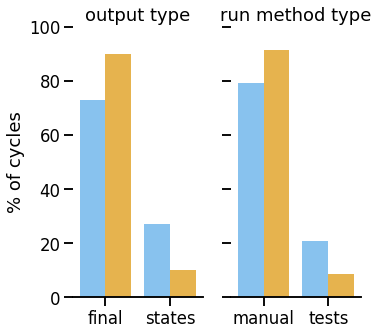

In [4]:
sns.set_context("talk", font_scale=1)

g = sns.catplot(x="characteristics", y='percentage', hue="work", kind='bar', col="type", data=outputResult,palette={"programming": "#FFBB35", "debugging": "#77C5FF"}, ci=None, aspect=.5,sharex=False, legend=False)

(g.set_axis_labels("", "% of cycles")
  .set_titles("{col_name} {col_var}")
  .set(ylim=(0, 100))
  .despine(left=True))  

plt.savefig("runChara.pdf")


In [5]:
x =edits.groupby("work")["editFiles"].value_counts(sort=False,normalize=True)
y =edits.groupby("work")["browsFile"].value_counts(sort=False,normalize=True)



In [6]:
x

work         editFiles
debugging    0            0.177281
             1            0.731497
             2            0.075731
             3            0.005164
             4            0.006885
             5            0.003442
programming  0            0.154589
             1            0.613527
             2            0.130435
             3            0.043478
             4            0.033816
             5            0.009662
             6            0.009662
             7            0.004831
Name: editFiles, dtype: float64

In [7]:
y


work         browsFile
debugging    0            0.597246
             1            0.277108
             2            0.075731
             3            0.032702
             4            0.006885
             5            0.005164
             6            0.001721
             12           0.001721
             13           0.001721
programming  0            0.468599
             1            0.289855
             2            0.149758
             3            0.053140
             4            0.024155
             5            0.009662
             9            0.004831
Name: browsFile, dtype: float64

In [8]:
x.programming

editFiles
0    0.154589
1    0.613527
2    0.130435
3    0.043478
4    0.033816
5    0.009662
6    0.009662
7    0.004831
Name: editFiles, dtype: float64

In [9]:
x.programming[1:].sum()
x.programming[:1].sum()

0.15458937198067632

In [12]:
outputResult = pd.DataFrame({"work":["debugging","programming","debugging","programming","debugging","programming","debugging","programming","debugging","programming","debugging","programming","debugging","programming","debugging","programming"],"characteristics": ["0","0","1","1","2","2","+3","+3","0","0","1","1","2","2","+3","+3"],"percentage":[x.debugging[0]*100,x.programming[0]*100,x.debugging[1]*100,x.programming[1]*100,x.debugging[2]*100,x.programming[2]*100,x.debugging[3:].sum()*100,x.programming[3:].sum()*100,y.debugging[0]*100,y.programming[0]*100,y.debugging[1]*100,y.programming[1]*100,y.debugging[2]*100,y.programming[2]*100,y.debugging[3:].sum()*100,y.programming[3:].sum()*100], "files":["edit","edit","edit","edit","edit","edit","edit","edit","browse","browse","browse","browse","browse","browse","browse","browse"]})

outputResult

,work,characteristics,percentage,files
0,debugging,0,17.728055,edit
1,programming,0,15.458937,edit
2,debugging,1,73.149742,edit
3,programming,1,61.352657,edit
4,debugging,2,7.573150,edit
5,programming,2,13.043478,edit
6,debugging,+3,1.549053,edit
7,programming,+3,10.144928,edit
8,debugging,0,59.724613,browse
9,programming,0,46.859903,browse


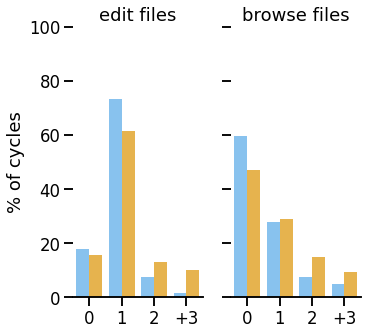

In [13]:
sns.set_context("talk", font_scale=1)

g = sns.catplot(x="characteristics", y='percentage', hue="work", kind='bar', col="files", data=outputResult,palette={"programming": "#FFBB35", "debugging": "#77C5FF"}, ci=None, aspect=.5,sharex=False, legend=False)

(g.set_axis_labels("", "% of cycles")
  .set_titles("{col_name} {col_var}")
  .set(ylim=(0, 100))
  .despine(left=True))  
plt.savefig("editChara.pdf")
